In [1]:
import manim

In [17]:
from manim import *
class Pendulum(VGroup):
    def phi_fun(self, amplitude,acceleration,length,time):
        return amplitude*np.sin(np.sqrt(acceleration/length)*time-np.pi/2)

    def __init__(self,amplitude, acceleration, length ,time, weight):
        VGroup.__init__(self)
        self.sound_stamps_there = []
        self.sound_stamps_back = []

        self.amplitude= amplitude
        self.acceleration= acceleration
        self.length = length
        self.time = time
        self.phi = self.phi_fun(amplitude, acceleration, length, time)
        self.anchor = Dot(ORIGIN)
        self.line1 = Line(ORIGIN, length*DOWN)
        self.line1.rotate(self.phi*DEGREES, about_point=self.line1.get_start())
        self.mass1 = LabeledDot(label= f"{weight}" + r"\, \text{kg}").scale(0.3)
        self.mass1.move_to(self.line1.get_end())
        self.mobj = VGroup(self.line1, self.anchor,self.mass1)
        self.add(self.mobj)
        
    def start(self):
        self.mobj.current_time = 0.000001
        def updater(mob, dt):
            mob.current_time += dt
            new_phi= self.phi_fun(self.amplitude,self.acceleration,self.length,mob.current_time)
            mob[0].rotate((new_phi-self.phi)*DEGREES, about_point=self.line1.get_start())
            if np.sign(self.phi) < np.sign(new_phi) :
                self.sound_stamps_there.append(mob.current_time)
            if np.sign(self.phi) > np.sign(new_phi) :
                self.sound_stamps_back.append(mob.current_time)


            self.phi= new_phi
            self.mass1.move_to(self.line1.get_end())

        self.mobj.add_updater(updater)
        

In [34]:
%%manim PenulumSceneXXX  -p -qm -v WARNING --disable_caching 
class PenulumSceneXXX(Scene):
    def construct(self):
        weights = [1,2,3,4,5,6,7,8,9]
        total= len(weights)
        for i,weight in enumerate(weights):
            pendulum = Pendulum(amplitude=10,acceleration= 10, length=2+weight*0.3,time= 0,weight= 1)

            anchor_pos= pendulum.anchor.get_center()
            dest_pos = (-total/2+i)*RIGHT+2*UP
            pendulum.shift(anchor_pos+dest_pos)
            self.add(pendulum)
            pendulum.start()
        waiting_time=20
        self.wait(waiting_time)

        for mobj in self.mobjects:
            for sound_stamp in mobj.sound_stamps_there:
                self.add_sound("tick.mp3", time_offset=-waiting_time + sound_stamp)
            for sound_stamp in mobj.sound_stamps_back:
                self.add_sound("tock.mp3", time_offset=-waiting_time + sound_stamp)
       
        self.wait()


In [145]:
!ls

3d_stack_images.py       media                    samples
code_matplotlib_tex_idea olaf_edit.py             tick.mp3
manim_pendulum.ipynb     run_manim.py             tock.mp3


In [146]:
!pwd

/Users/jan-hendrik/projects/manim/kolibril_projects/first_point


In [138]:
np.sign(-1)

-1

In [156]:
%%manim PenulumSceneX  -p -qm -v WARNING --disable_caching  

class PenulumSceneX(Scene):
    def construct(self):
        group=VGroup(Dot(LEFT),Dot(ORIGIN), Dot(RIGHT, color=RED), Dot(2*RIGHT))
        dest= Dot(np.random.rand(3)*4, color= YELLOW)
        self.add(group,dest)
        self.add_sound("tick.mp3")
        self.wait()
        #group.move_to(dest) not working


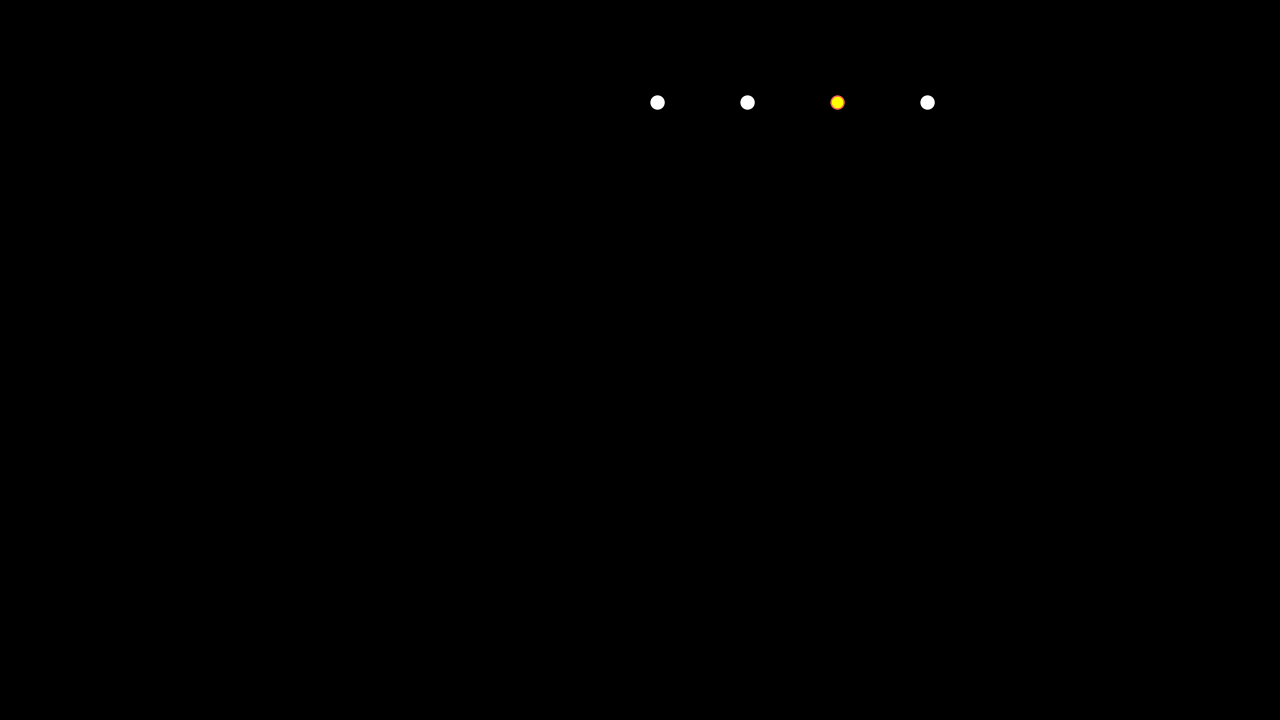

In [109]:
%%manim PenulumSceneXX  -p -qm -v WARNING --disable_caching  -s

class PenulumSceneXX(Scene):
    def construct(self):
        group=VGroup(Dot(LEFT),Dot(ORIGIN), Dot(RIGHT, color=RED), Dot(2*RIGHT))
        dest= Dot(np.random.rand(3)*4, color= YELLOW).scale(0.8)
        self.add(group,dest)
        group.shift(dest.get_center()-group[2].get_center())
